# Project 2 - EDA on Vehicle Insurance Customer Data

## 1

## Loading the files and creating the columns

In [1]:
# import pandas library and import the .csv files

import pandas as pd

Cust_Details = pd.read_csv('customer_details.csv')

Cust_Policy = pd.read_csv('customer_policy_details.csv')

Cust_Details.name = 'Customer Details'

Cust_Policy.name = 'Customer Policy Details'


# i) and ii) adding the column names

cd_column_list = ['customer_id','Gender','age','driving licence present','region code',
                 'previously insured','vehicle age', 'vehicle damage']
cp_column_list = ['customer_id','annual_premium(in Rs)','sales channel code',
                 'vintage','response']

Cust_Details.columns = cd_column_list
Cust_Policy.columns = cp_column_list

print(Cust_Details.shape)

print(Cust_Policy.shape)







(381109, 8)
(381109, 5)


## 2

## Null value count

In [2]:
def null_value_counts(df):
    null_count = df.isnull().sum()
    return null_count

# i) null value count summary
print('null value count for Customer Details Data is :','\n',null_value_counts(Cust_Details),'\n')

print('null value count for Customer Policy Data is :','\n',null_value_counts(Cust_Policy),'\n')


null value count for Customer Details Data is : 
 customer_id                386
Gender                     368
age                        368
driving licence present    393
region code                392
previously insured         381
vehicle age                381
vehicle damage             407
dtype: int64 

null value count for Customer Policy Data is : 
 customer_id              387
annual_premium(in Rs)    346
sales channel code       400
vintage                  388
response                 361
dtype: int64 



## Dropping null values of customer id

In [3]:
# drop null values for customer_id's
import numpy as np


Cust_Details.dropna(subset = ['customer_id'],inplace = True)

Cust_Policy.dropna(subset = ['customer_id'],inplace = True)



## Filling null values with mean and mode

In [4]:
# filling the numeric type column Nan value with mean value of the column

Cd_num_columns = Cust_Details.select_dtypes(np.number).columns.tolist()
Cp_num_columns = Cust_Policy.select_dtypes(np.number).columns.tolist()

def fill_na_mean(Data,col_list):
    
    for cols in col_list:
        mean = Data[cols].mean()
        Data[cols].fillna(mean,inplace = True)
def fill_na_mode(Data,col_list):
    
    for cols in col_list:
        mode = Data[cols].mode()
        Data[cols].fillna(mode[0],inplace = True)
        

        
        
fill_na_mean(Cust_Details,Cd_num_columns)
fill_na_mean(Cust_Policy,Cp_num_columns)

# filling the categorical values with mode value of the column

cd_obj_columns = Cust_Details.select_dtypes(include = 'object').columns.tolist()
cp_obj_columns = Cust_Policy.select_dtypes(include = 'object').columns.tolist()

fill_na_mode(Cust_Details,cd_obj_columns)
fill_na_mode(Cust_Policy,cp_obj_columns)   

## Finding outliers

In [5]:

def outliers_count(Data,col):
    if Data[col].dtype == np.number:
        
        Q1 = Data[col].quantile(0.25)
        Q3 = Data[col].quantile(0.75)
        IQR = Q3 - Q1
    
        lower_outlier = Q1 - 1.5*IQR
        higher_outlier = Q3 + 1.5*IQR
    
        outliers = Data[(Data[col]<lower_outlier)|(Data[col]>higher_outlier)]
        print(f'The outliers count for {col} in Dataframe {Data.name} is :',outliers[col].count())
    else:
        raise Exception('selected column data type is not numeric')

        
def outlier(Data,col):
    if Data[col].dtype == np.number:
        Q1 = Data[col].quantile(0.25)
        Q3 = Data[col].quantile(0.75)
        IQR = Q3 - Q1
    
        lower_outlier = Q1 - 1.5*IQR
        higher_outlier = Q3 + 1.5*IQR
    
        outliers = Data[(Data[col]<lower_outlier)|(Data[col]>higher_outlier)]
    
        return outliers[col]
    else:
        raise Exception('selected column data type is not numeric')
        

    
outliers_count(Cust_Details,'age')
outliers_count(Cust_Details,'driving licence present')
outliers_count(Cust_Details,'previously insured')
outliers_count(Cust_Details,'customer_id')
print('\n')
outliers_count(Cust_Policy,'customer_id')
outliers_count(Cust_Policy,'annual_premium(in Rs)')
outliers_count(Cust_Policy,'sales channel code')
outliers_count(Cust_Policy,'vintage')
outliers_count(Cust_Policy,'response')




#ignore the deprecation warning caused by outdated libraries


The outliers count for age in Dataframe Customer Details is : 0
The outliers count for driving licence present in Dataframe Customer Details is : 1203
The outliers count for previously insured in Dataframe Customer Details is : 0
The outliers count for customer_id in Dataframe Customer Details is : 0


The outliers count for customer_id in Dataframe Customer Policy Details is : 0
The outliers count for annual_premium(in Rs) in Dataframe Customer Policy Details is : 10332
The outliers count for sales channel code in Dataframe Customer Policy Details is : 0
The outliers count for vintage in Dataframe Customer Policy Details is : 0
The outliers count for response in Dataframe Customer Policy Details is : 46965


C:\Users\Kushwanth\AppData\Local\Temp\ipykernel_14840\1021809673.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if Data[col].dtype == np.number:
C:\Users\Kushwanth\AppData\Local\Temp\ipykernel_14840\1021809673.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if Data[col].dtype == np.number:
C:\Users\Kushwanth\AppData\Local\Temp\ipykernel_14840\1021809673.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if Data[col].dtype == np.number:
C:\Users\Kushwanth\AppData\Local\Temp\ipykernel_14840\1021809673.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if Data[c

## Replacing outliers with mean

In [24]:
# replacing the outliers with mean

def outliers_replace_with_mean(Data,col):
    if Data[col].dtype == np.number:
        Q1 = Data[col].quantile(0.25)
        Q3 = Data[col].quantile(0.75)
        IQR = Q3 - Q1
    
        lower_outlier = Q1 - 1.5*IQR
        higher_outlier = Q3 + 1.5*IQR
    
        outliers = (Data[col]<lower_outlier)|(Data[col]>higher_outlier)
        without_outliers = Data[~outliers]
        mean = without_outliers[col].mean()
        Data.loc[outliers,col] = mean
        
    
        return Data
    else:
        raise Exception('selected column data type is not numeric')

        
        
        
outliers_replace_with_mean(Cust_Details,'driving licence present') 
outliers_count(Cust_Details,'driving licence present')

outliers_replace_with_mean(Cust_Policy,'annual_premium(in Rs)')
outliers_count(Cust_Policy,'annual_premium(in Rs)')
# replacing the outliers with mean in annual_premium column just reduced the outliers so I repeated the process until the outliers are zero

outliers_replace_with_mean(Cust_Policy,'response')
outliers_count(Cust_Policy,'response')
    

The outliers count for driving licence present in Dataframe Customer Details is : 0
The outliers count for annual_premium(in Rs) in Dataframe Customer Policy Details is : 0
The outliers count for response in Dataframe Customer Policy Details is : 0


C:\Users\Kushwanth\AppData\Local\Temp\ipykernel_14840\4211551349.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if Data[col].dtype == np.number:
C:\Users\Kushwanth\AppData\Local\Temp\ipykernel_14840\1021809673.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if Data[col].dtype == np.number:
C:\Users\Kushwanth\AppData\Local\Temp\ipykernel_14840\4211551349.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if Data[col].dtype == np.number:
C:\Users\Kushwanth\AppData\Local\Temp\ipykernel_14840\1021809673.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if Data[c


## Removing whitespaces, case correction, convert nominal data into dummies, drop duplicates

In [28]:
# iii) Removing white spaces
Cust_Details = Cust_Details.applymap(lambda x: x.strip() if isinstance(x,str) else x)
Cust_Policy = Cust_Policy.applymap(lambda x: x.strip() if isinstance(x,str) else x)
# iv) Case correction to uppercase

Cust_Details = Cust_Details.applymap(lambda x: x.upper() if isinstance(x,str) else x)

Cust_Policy = Cust_Policy.applymap(lambda x: x.upper() if isinstance(x,str) else x)

# v) Convert nominal data into dummies

Cust_Details_dummies = Cust_Details['Gender'].apply(lambda x: 1 if x.upper() == 'MALE' else 0)
  
# vi) dropping duplicated rows

Cust_Details = Cust_Details.drop_duplicates(subset = 'customer_id')

Cust_Policy = Cust_Policy.drop_duplicates(subset = 'customer_id')




## 3

## Creating master table by joining two dataframes

In [29]:
Master_table = pd.merge(Cust_Details,Cust_Policy,on = 'customer_id')

Master_table

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage,annual_premium(in Rs),sales channel code,vintage,response
0,1.0,MALE,44.0,1.0,28.0,0.0,> 2 YEARS,YES,32842.102595,26.0,217.0,0.0
1,2.0,MALE,76.0,1.0,3.0,0.0,1-2 YEAR,NO,33536.000000,26.0,183.0,0.0
2,3.0,MALE,47.0,1.0,28.0,0.0,> 2 YEARS,YES,33392.650125,26.0,27.0,0.0
3,4.0,MALE,21.0,1.0,11.0,1.0,< 1 YEAR,NO,33392.650125,152.0,203.0,0.0
4,5.0,FEMALE,29.0,1.0,41.0,1.0,< 1 YEAR,NO,33077.366063,152.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
380331,381105.0,MALE,74.0,1.0,26.0,1.0,1-2 YEAR,NO,30170.000000,26.0,88.0,0.0
380332,381106.0,MALE,30.0,1.0,37.0,1.0,< 1 YEAR,NO,32842.102595,152.0,131.0,0.0
380333,381107.0,MALE,21.0,1.0,30.0,1.0,< 1 YEAR,NO,35118.000000,160.0,161.0,0.0
380334,381108.0,FEMALE,68.0,1.0,14.0,0.0,> 2 YEARS,YES,32629.379066,124.0,74.0,0.0


## 4

## Important information from Master table

Gender wise average annual premium is : 
 Gender
FEMALE    33386.549928
MALE      33436.739226
Name: annual_premium(in Rs), dtype: float64 

Age wise average annual premium is :
age
20.0     6216
21.0    16412
22.0    20897
23.0    24196
24.0    25884
        ...  
81.0       56
82.0       29
83.0       22
84.0       11
85.0       11
Name: age, Length: 67, dtype: int64 



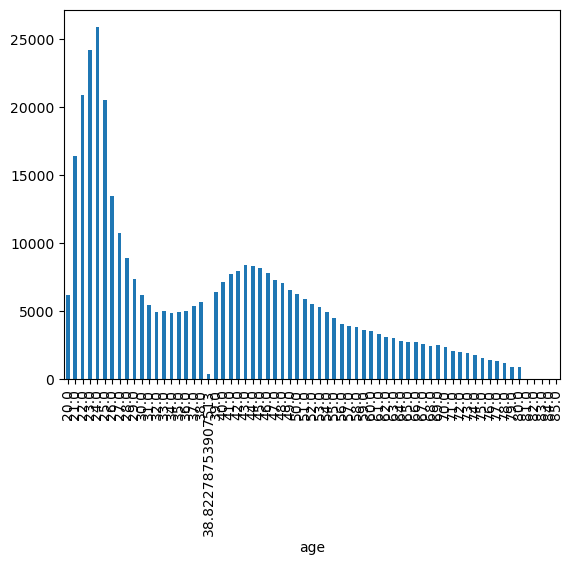

In [30]:
# i) Gender wise annual premium

annual_premium_gender_mean = Master_table.groupby('Gender')['annual_premium(in Rs)'].mean()

print('Gender wise average annual premium is :','\n',annual_premium_gender_mean,'\n')


# ii) Age wise annual premium 

annual_premium_age_count = Master_table.groupby('age')['age'].count()

print('Age wise average annual premium is :')
print(annual_premium_age_count,'\n')

age_premium_graph = annual_premium_age_count.plot(kind = 'bar',x = 'age',y = 'annual_premium(in Rs)')





In [31]:
# iii) is data balanced between Genders
Gender_count = Master_table.groupby('Gender')['customer_id'].count()
print(Gender_count)
if Gender_count['MALE'] == Gender_count['FEMALE']:
    print('Gender data is balanced')
else:
    print('Gender data is not balanced')



Gender
FEMALE    174485
MALE      205851
Name: customer_id, dtype: int64
Gender data is not balanced


In [33]:
# iv) vehicle age wise average annual premium

Vehicle_age_group = Master_table.groupby('vehicle age')
mean_annual_vehicle = Vehicle_age_group['annual_premium(in Rs)'].mean()
print(mean_annual_vehicle)

vehicle age
1-2 YEAR     33484.788320
< 1 YEAR     33318.735651
> 2 YEARS    33500.526387
Name: annual_premium(in Rs), dtype: float64


## 5

## Finding Correlation between Annual premium and Age

In [34]:
correlation = Master_table['age'].corr(Master_table['annual_premium(in Rs)'])
if correlation >0.5:
    print('The relation between Person Age and annual premium is strong positive relationship')
elif correlation < -0.5:
    print('The relation between Person Age and annual premium is strong negative relationship')
else:
    print('There is no relation between Person age and annual premium')

There is no relation between Person age and annual premium
